# 6. Particles: Projections

## Load The Data

In [1]:
using Mera
info = getinfo(300, "/Volumes/FASTStorage/Simulations/Mera-Tests/mw_L10");
particles  = getparticles(info); 

[Mera]: 2025-06-21T21:47:29.965

Code: RAMSES
output [300] summary:
mtime: 2023-04-09T05:34:09
ctime: 2025-06-21T18:31:24.020
simulation time: 445.89 [Myr]
boxlen: 48.0 [kpc]
ncpu: 640
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 10 --> cellsize(s): 750.0 [pc] - 46.88 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :pressure, :scalar_00, :scalar_01)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Nstars:   5.445150e+05 
particle-variables: 7  --> (:vx, :vy, :vz, :mass, :family, :tag, :birth)
particle-descriptor: (:position_x, :position_y, :position_z, :velocity_x, :velocity_y, :velocity_z, :mass, :identity, :levelp,

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


Found 5.445150e+05 particles
Memory used for data table :38.428720474243164 MB
-------------------------------------------------------



In [2]:
particles.data

Table with 544515 rows, 12 columns:
Columns:
#   colname  type
────────────────────
1   level    Int32
2   x        Float64
3   y        Float64
4   z        Float64
5   id       Int32
6   family   Int8
7   tag      Int8
8   vx       Float64
9   vy       Float64
10  vz       Float64
11  mass     Float64
12  birth    Float64

## Projection of Predefined Quantities

See the possible variables:

In [3]:
projection()

Predefined vars for projections:
------------------------------------------------
=====================[gas]:=====================
       -all the non derived hydro vars-
:cpu, :level, :rho, :cx, :cy, :cz, :vx, :vy, :vz, :p, var6,...
further possibilities: :rho, :density, :ρ
              -derived hydro vars-
:x, :y, :z
:sd or :Σ or :surfacedensity
:mass, :cellsize, :freefall_time
:cs, :mach, :machx, :machy, :machz, :jeanslength, :jeansnumber
:t, :Temp, :Temperature with p/rho

==================[particles]:==================
        all the non derived  vars:
:cpu, :level, :id, :family, :tag 
:x, :y, :z, :vx, :vy, :vz, :mass, :birth, :metal....

              -derived particle vars-
:age

==============[gas or particles]:===============
:v, :ekin
squared => :vx2, :vy2, :vz2
velocity dispersion => σx, σy, σz, σ

related to a given center:
---------------------------
:vr_cylinder, vr_sphere (radial components)
:vϕ_cylinder, :vθ
squared => :vr_cylinder2, :vϕ_cylinder2
velocity dispersion

## Projection of a Single Quantity in Different Directions (z,y,x)

Here we project the surface density in the z-direction of the data within a particular vertical range (domain=[0:1]) on a grid corresponding to level=9. 
Pass any object of *PartDataType* (here: "particles") to the *projection*-function and select a variable by a Symbol (here: :sd = :surfacedensity = :Σ in Msol/pc^3)

In [4]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, lmax=9, zrange=[0.45,0.55])
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, zrange=[0.45,0.55], verbose=false) # The keyword "unit" (singular) can be omit if the following order is preserved: data-object, quantity, unit.
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9, direction = :x, zrange=[0.45,0.55], verbose=false); # Project the surface density in x-direction

[Mera]: 2025-06-21T21:47:54.293

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



### Select a Range Related to a Center
See also in the documentation for: load data by selection

In [5]:
cv = (particles.boxlen / 2.) * particles.scale.kpc # provide the box-center in kpc
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[cv,cv,cv], range_unit=:kpc);

[Mera]: 2025-06-21T21:48:01.995

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



Use the short notation for the box center :bc or :boxcenter for all dimensions (x,y,z):

In [6]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:boxcenter], range_unit=:kpc);

[Mera]: 2025-06-21T21:48:04.467

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



In [7]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc], range_unit=:kpc);

[Mera]: 2025-06-21T21:48:06.341

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



Use the box center notation for individual dimensions, here x,z:

In [8]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, 
                        xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                        center=[:bc, 24., :bc], range_unit=:kpc);

[Mera]: 2025-06-21T21:48:08.585

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



### Get Multiple Quantities

Get several quantities with one function call by passing an array containing the selected variables (at least one entry). The keyword name for the units is now in plural.

In [9]:
proj1_x = projection(particles, [:sd], units=[:Msol_pc2], lmax=9,
                        direction = :x, 
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2025-06-21T21:48:10.492

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



Pass an array containing several quantities to process and their corresponding units:

In [10]:
proj1_z = projection(particles, [:sd, :vx], units=[:Msol_pc2, :km_s], lmax=9,
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2025-06-21T21:48:12.140

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



The function can be called without any keywords by preserving the following order: dataobject, variables, units

In [11]:
proj1_z = projection(particles, [:sd , :vx], [:Msol_pc2, :km_s], lmax=9,
                        direction = :x,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2025-06-21T21:48:14.377

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



If all selected variables should be of the same unit use the following arguments: dataobject, array of quantities, unit (no array needed)

In [12]:
projvel_z = projection(particles, [:vx, :vy, :vz], :km_s, lmax=9,
                        xrange=[-10.,10.], 
                        yrange=[-10.,10.], 
                        zrange=[-2.,2.], 
                        center=[24.,24.,24.], 
                        range_unit=:kpc);

[Mera]: 2025-06-21T21:48:16.103

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



## Function Output

List the fields of the assigned object:

In [13]:
propertynames(projvel_z)

(:maps, :maps_unit, :maps_lmax, :maps_mode, :lmax_projected, :lmin, :lmax, :ref_time, :ranges, :extent, :cextent, :ratio, :effres, :pixsize, :boxlen, :scale, :info)

The projected 2D maps are stored in a dictionary:

In [14]:
projvel_z.maps # NaN for empty regions

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 4 entries:
  :sd => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 …
  :vx => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN …
  :vy => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN …
  :vz => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN …

The maps can be accessed by giving the name of the dictionary:

In [15]:
proj1_z.maps[:sd]

214×44 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

The units of the maps are stored in:

In [16]:
projvel_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 4 entries:
  :sd => :standard
  :vx => :km_s
  :vy => :km_s
  :vz => :km_s

The following fields are helpful for further calculations or plots.

In [17]:
projvel_z.ranges # normalized to the domain=[0:1]

6-element Vector{Float64}:
 0.29166666666647767
 0.7083333333328743
 0.29166666666647767
 0.7083333333328743
 0.4583333333330363
 0.5416666666663156

In [18]:
projvel_z.extent # ranges in code units

4-element Vector{Float64}:
 13.96875
 34.03125
 13.96875
 34.03125

In [19]:
projvel_z.cextent # ranges in code units relative to a given center (by default: box center)

4-element Vector{Float64}:
 -10.031250000015554
  10.031249999984446
 -10.031250000015554
  10.031249999984446

In [20]:
proj1_z.ratio # the ratio between the two ranges

4.863636363636363

## Plot Maps with Python

In [21]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    direction = :x);

Python functions can be directly called in Julia, which gives the opportunity, e.g. to use the Matplotlib library.

In [22]:
using PyPlot
using ColorSchemes
cmap = ColorMap(ColorSchemes.lajolla.colors) # See http://www.fabiocrameri.ch/colourmaps.php
cmap2 = ColorMap(reverse(ColorSchemes.roma.colors))

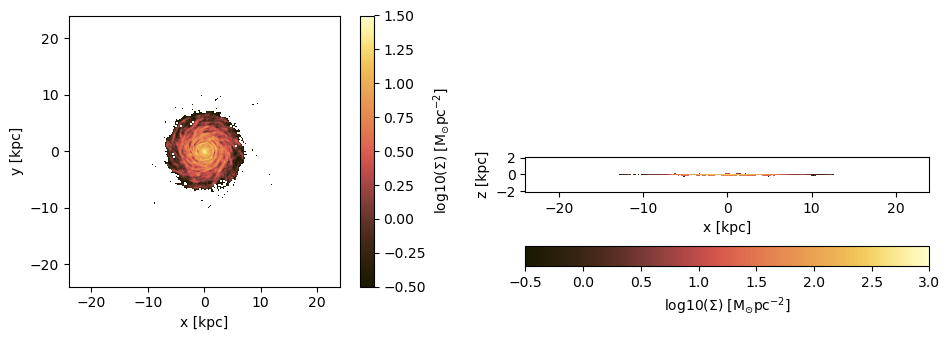

In [23]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=-0.5, vmax=1.5)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=-0.5, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);
tight_layout()

Project a specific spatial range and plot the axes of the map relative to the box-center (given by keyword: data_center):

In [24]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9, 
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[24.,24.,24.], data_center_unit=:kpc, 
                    direction = :x);

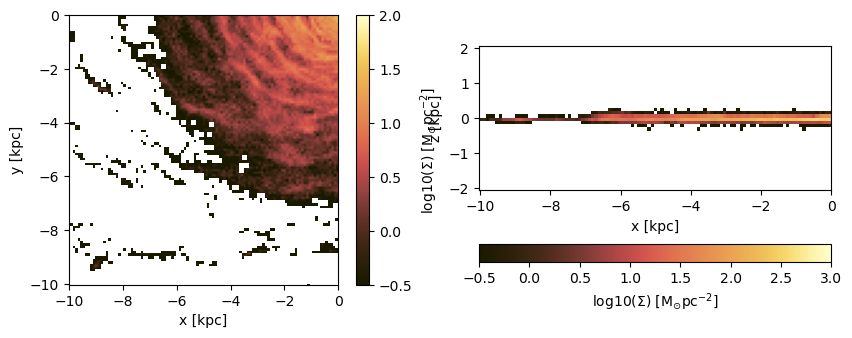

In [25]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=-0.5, vmax=2.)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=-0.5, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

Plot the axes of the map relative to the map-center (given by keyword: data_center):

In [26]:
proj_z = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc) 
proj_x = projection(particles, :sd, :Msol_pc2, lmax=9,
                    xrange=[-10.,0.], yrange=[-10.,0.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc,
                    verbose=false, 
                    data_center=[19.,19.,24.], data_center_unit=:kpc, 
                    direction = :x);

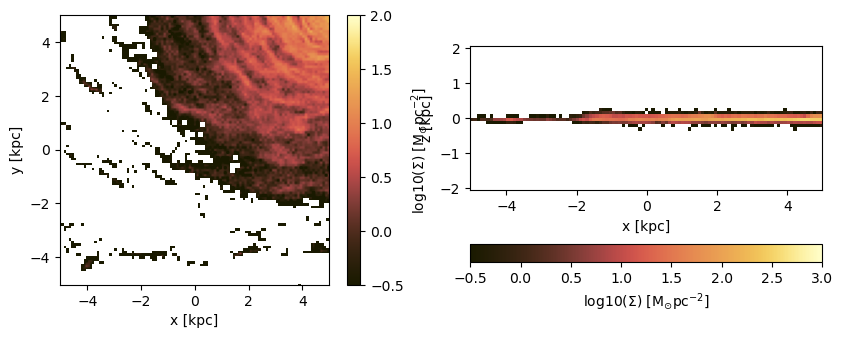

In [27]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd])), cmap=cmap, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=-0.5, vmax=2.)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:sd])), cmap=cmap, origin="lower", extent=proj_x.cextent, vmin=-0.5, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}",orientation="horizontal", pad=0.2);

## Projections of Derived Kinematic Data

#### Use quantities in cartesian coordinates:

Project the following derived data
(mass weighted by default): The absolute value of the velocity :v, the velocity dispersion :σ in different directions and the kinetic energy :ekin. The Julia language supports Unicode characters and can be inserted by e.g. "\sigma + tab-key" leading to: **σ**.

In [28]:
proj_z = projection(particles, [:v, :σ, :σx, :σy, :σz, :ekin], 
                    units=[:km_s,:km_s,:km_s,:km_s,:km_s,:erg], 
                    lmax=9,
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[24.,24.,24.], range_unit=:kpc);

[Mera]: 2025-06-21T21:48:36.022

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 512^2
Pixel size: 93.75 [pc]
Simulation min.: 46.875 [pc]



Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


For the velocity dispersion additional maps are created to created the mass-weighted quantity:
E. g.: σx = sqrt( <vx^2> - < vx >^2 )

In [29]:
proj_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 14 entries:
  :ekin => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :sd   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.…
  :v    => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :v2   => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vx   => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vx2  => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vy   => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vy2  => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vz   => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :vz2  => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :σ    => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN Na…
  :σx   => [NaN NaN … NaN Na

In [30]:
proj_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 14 entries:
  :ekin => :erg
  :sd   => :standard
  :v    => :km_s
  :v2   => :standard
  :vx   => :standard
  :vx2  => :standard
  :vy   => :standard
  :vy2  => :standard
  :vz   => :standard
  :vz2  => :standard
  :σ    => :km_s
  :σx   => :km_s
  :σy   => :km_s
  :σz   => :km_s

In [31]:
usedmemory(proj_z);

Memory used: 4.918 MB


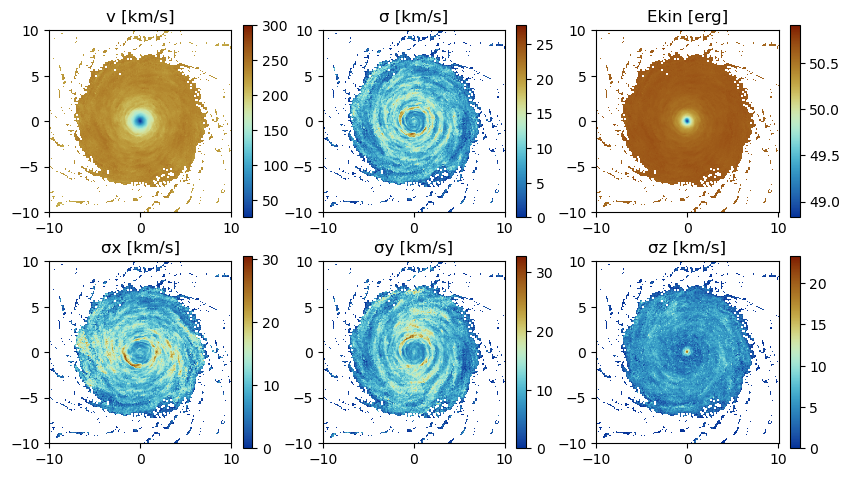

In [32]:
figure(figsize=(10, 5.5))

subplot(2, 3, 1)
title("v [km/s]")
imshow( (permutedims(proj_z.maps[:v])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent, vmax=300.)
colorbar()


subplot(2, 3, 2)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 3)
title("Ekin [erg]")
imshow( log10.(permutedims(proj_z.maps[:ekin]) ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 4)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx])   ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 5)
title("σy [km/s]")
imshow( (permutedims(proj_z.maps[:σy])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(2, 3, 6)
title("σz [km/s]")
imshow( (permutedims(proj_z.maps[:σz])  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();


#### Use quantities in cylindrical coordinates:
#### Face-on disc (z-direction)
For the cylindrical or spherical components of a quantity, the center of the coordinate system is used (keywords: data_center = center default) and can be given with the keyword "data_center" and its units with "data_center_unit". Additionally, the quantities that are based on cartesian coordinates can be given.

In [33]:
proj_z = projection(particles, [:v, :σ, :σx, :σy, :ϕ, :r_cylinder, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder],                    
                    units=[:km_s,:km_s,:km_s, :km_s, :standard, :kpc, :km_s, :km_s, :km_s, :km_s], 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.], 
                    center=[:boxcenter], range_unit=:kpc,
                    data_center=[24.,24.,24.], data_center_unit=:kpc); 

[Mera]: 2025-06-21T21:48:40.170

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 1024^2
Pixel size: 46.875 [pc]
Simulation min.: 46.875 [pc]



In [34]:
proj_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => [14.0758 14.0427 … 14.1201 14.1534; 14.0427 14.0096 … 14.087…
  :sd           => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0…
  :v            => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :v2           => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vr_cylinder  => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vr_cylinder2 => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vx           => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vx2          => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vy           => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vy2          => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vϕ_cylinder  => [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN…
  :vϕ_cylinder2 => [NaN NaN 

In [35]:
proj_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 18 entries:
  :r_cylinder   => :kpc
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σϕ_cylinder  => :km_s
  :ϕ            => :radian

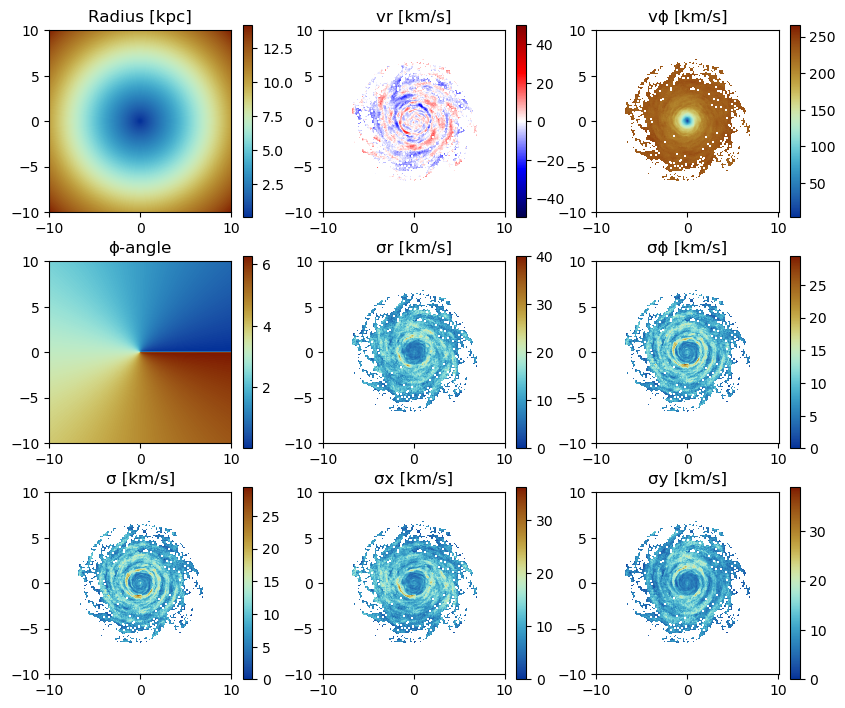

In [36]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("Radius [kpc]")
imshow( permutedims(proj_z.maps[:r_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap="seismic", origin="lower", extent=proj_z.cextent, vmin=-50.,vmax=50.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("ϕ-angle")
imshow( (permutedims(proj_z.maps[:ϕ]) ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( permutedims(proj_z.maps[:σr_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( permutedims(proj_z.maps[:σϕ_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ]) ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( permutedims(proj_z.maps[:σx]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( permutedims(proj_z.maps[:σy] ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

## Project on a Coarser Grid

### lmax
The default is the projection on the maximum loaded grid level (always provided in the output). Choose a smaller/larger level with the keyword `lmax` (independend on the maximum level of the simulation) to project on a coarser/finer grid. By default, the data is assumed to be in the center of the simulation box.

In [37]:
proj_z = projection(particles, 
                    [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    lmax=6); 

[Mera]: 2025-06-21T21:48:44.484

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 64^2
Pixel size: 750.0 [pc]
Simulation min.: 46.875 [pc]



The projection onto the maximum loaded grid is always provided:

In [38]:
proj_z.maps

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 19 entries:
  :sd           => [3.6988e-5 6.11725e-5 … 2.84523e-5 4.26785e-6; 0.000146885 8…
  :v            => [215.727 217.893 … 213.689 211.398; 211.909 214.371 … 215.29…
  :v2           => [10.8327 11.0472 … 10.6218 10.3945; 10.4511 10.6909 … 10.782…
  :vr_cylinder  => [-4.97035 9.83744 … 0.326624 -5.23378; -8.36334 3.71396 … 7.…
  :vr_cylinder2 => [0.0231364 0.0346302 … 0.0196151 0.0344127; 0.0339309 0.0312…
  :vx           => [2.38824 2.13472 … -2.30736 -2.28246; 2.4166 2.28742 … -2.49…
  :vx2          => [5.71099 4.56492 … 5.33794 5.23511; 5.844 5.24859 … 6.2532 6…
  :vy           => [-2.25778 -2.54366 … -2.29652 -2.26901; -2.14059 -2.32778 … …
  :vy2          => [5.12035 6.48209 … 5.28291 5.15929; 4.60593 5.44099 … 4.5285…
  :vz           => [-0.032174 0.00624848 … -0.0229633 0.00636579; -0.0269481 -0…
  :vz2          => [0.00140393 0.000219812 … 0.000962049 0.000127987; 0.0011519…
  :vϕ_cylinder  => [215.479 

In [39]:
proj_z.maps_unit

DataStructures.SortedDict{Any, Any, Base.Order.ForwardOrdering} with 19 entries:
  :sd           => :standard
  :v            => :km_s
  :v2           => :standard
  :vr_cylinder  => :km_s
  :vr_cylinder2 => :standard
  :vx           => :standard
  :vx2          => :standard
  :vy           => :standard
  :vy2          => :standard
  :vz           => :standard
  :vz2          => :standard
  :vϕ_cylinder  => :km_s
  :vϕ_cylinder2 => :standard
  :σ            => :km_s
  :σr_cylinder  => :km_s
  :σx           => :km_s
  :σy           => :km_s
  :σz           => :km_s
  :σϕ_cylinder  => :km_s

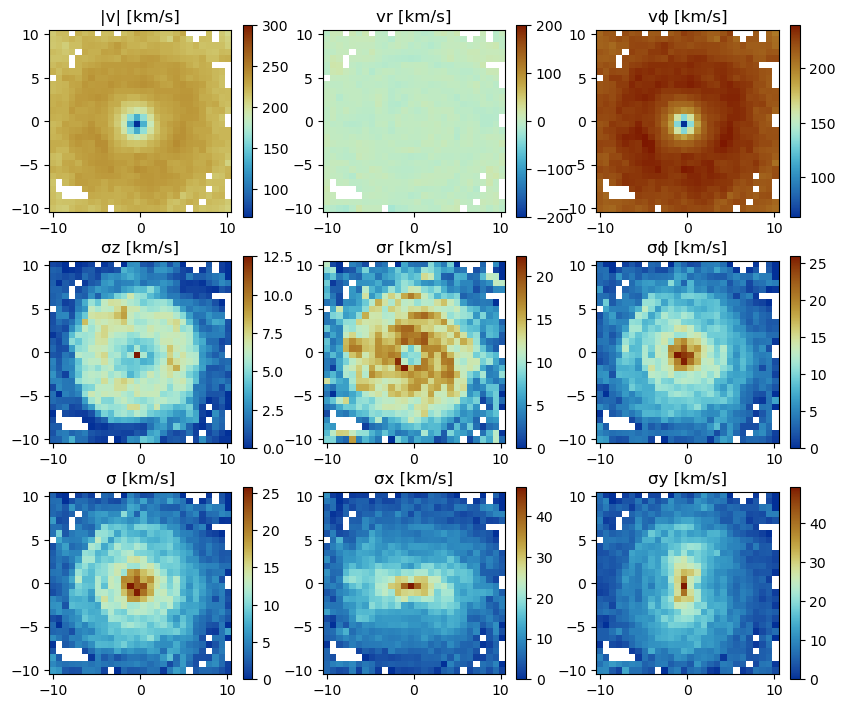

In [40]:
figure(figsize=(10, 8.5))

subplot(3, 3, 1)
title("|v| [km/s]")
imshow( permutedims(proj_z.maps[:v]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent, vmax=300.)
colorbar()


subplot(3, 3, 2)
title("vr [km/s]")
imshow( permutedims(proj_z.maps[:vr_cylinder] ), cmap=cmap2, origin="lower", extent=proj_z.cextent, vmin=-200.,vmax=200.)
colorbar()


subplot(3, 3, 3)
title("vϕ [km/s]")
imshow( permutedims(proj_z.maps[:vϕ_cylinder]  ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 4)
title("σz [km/s]")
imshow( (permutedims(proj_z.maps[:σz]) ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 5)
title("σr [km/s]")
imshow( (permutedims(proj_z.maps[:σr_cylinder]  )), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 6)
title("σϕ [km/s]")
imshow( (permutedims(proj_z.maps[:σϕ_cylinder] )), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 7)
title("σ [km/s]")
imshow( (permutedims(proj_z.maps[:σ]) ), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()



subplot(3, 3, 8)
title("σx [km/s]")
imshow( (permutedims(proj_z.maps[:σx]  )), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar()


subplot(3, 3, 9)
title("σy [km/s]")
imshow( (permutedims(proj_z.maps[:σy] )), cmap=cmap2, origin="lower", extent=proj_z.cextent)
colorbar();

### res
Choose the effective resolution (related to the full box) of the projected grid:

In [41]:
proj_z = projection(particles, 
                    [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    res=100); 

[Mera]: 2025-06-21T21:48:48.143

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 100^2
Pixel size: 480.0 [pc]
Simulation min.: 46.875 [pc]



### pxsize
Choose the pixel size in a physical unit, e.g. pixel-size=100 pc. The data is projected to a grid with a pixel-size that is closest to the given number, but not larger:

In [42]:
proj_z = projection(particles, 
                    [:v, :σ, :σx, :σy, :σz, :vr_cylinder, :vϕ_cylinder, :σr_cylinder, :σϕ_cylinder], 
                    :km_s, 
                    xrange=[-10.,10.], yrange=[-10.,10.], zrange=[-2.,2.],
                    center=[:boxcenter], range_unit=:kpc,
                    pxsize=[100., :pc]); 

[Mera]: 2025-06-21T21:48:50.936

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Effective resolution: 481^2
Pixel size: 99.792 [pc]
Simulation min.: 46.875 [pc]



## Projection of the Birth/Age-Time

Project the average birth-time of the particles to the grid:

In [43]:
proj_z = projection(particles, :birth, :Myr,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], verbose=false); 
proj_x = projection(particles, :birth, :Myr,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], direction=:x, verbose=false); 

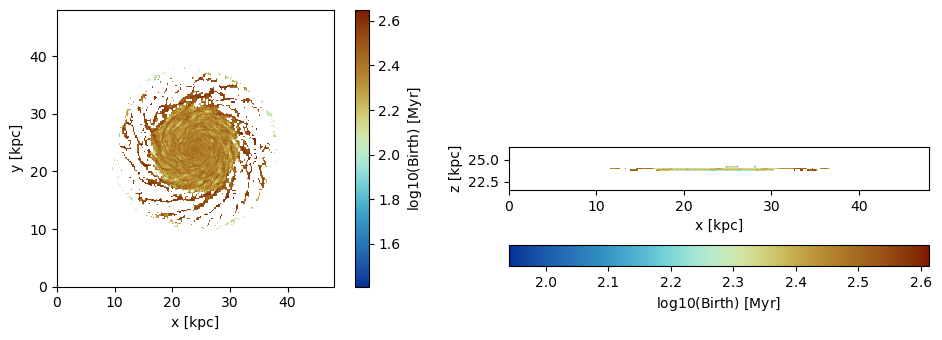

In [44]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:birth])), cmap=cmap2, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Birth) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:birth])), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Birth) \ [Myr]}",orientation="horizontal", pad=0.2);
tight_layout()

Project the average age of the particles to the grid. The age is taken relative to the loaded snapshot time by default.

In [45]:
proj_z = projection(particles, :age, :Myr,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], verbose=false); 
proj_x = projection(particles, :age, :Myr,
                    lmax=8,  zrange=[0.45,0.55], direction=:x,  center=[0.,0.,0.], verbose=false); 

The reference time (code units) for the age calculation:

In [46]:
proj_z.ref_time

29.9031937665063

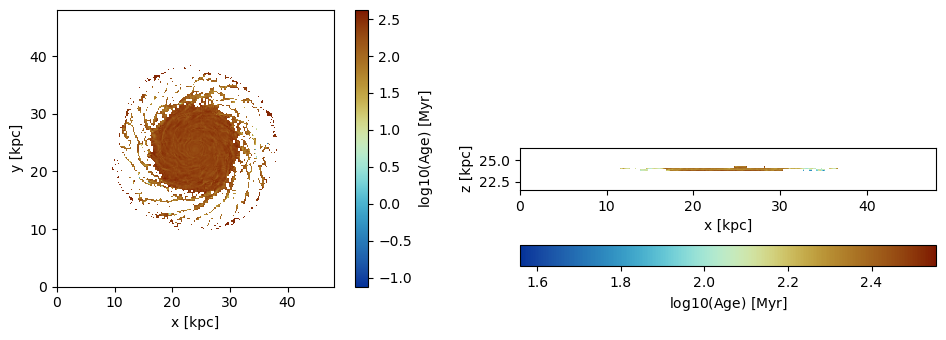

In [47]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:age])), cmap=cmap2, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:age])), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}",orientation="horizontal", pad=0.2);
tight_layout()

Project the average age of the particles relative to a given reference time:

In [48]:
proj_z = projection(particles, :age, :Myr, ref_time=0.,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], verbose=false); 
proj_x = projection(particles, :age, :Myr, ref_time = 0.,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], direction=:x, verbose=false); 

The reference time (code units) for the age calculation:

In [49]:
proj_z.ref_time

0.0

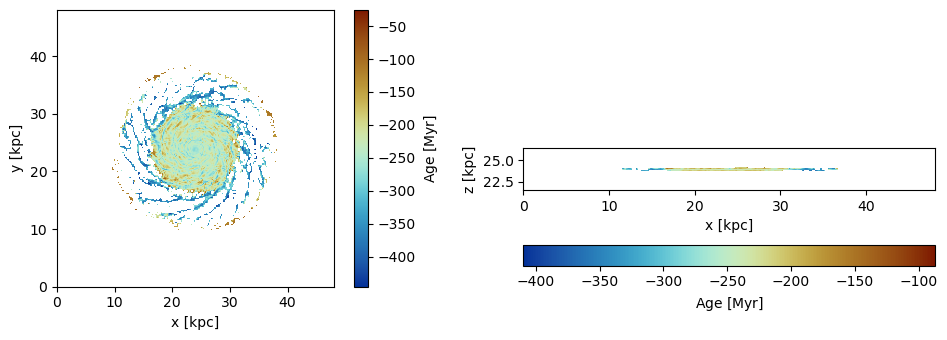

In [50]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( ( permutedims(proj_z.maps[:age])), cmap=cmap2, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{Age \ [Myr]}")

subplot(1,2,2)
im = imshow( ( permutedims(proj_x.maps[:age])), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{Age \ [Myr]}",orientation="horizontal", pad=0.2);
tight_layout()

## Projection of Masked Data

Mask particles with ages higher than 400 Myr by creating a Bool-array where the smaller ages correspond to false entries:

In [51]:
mask = getvar(particles, :age, :Myr) .> 400. ;

In [52]:
proj_z = projection(particles, :age, :Myr, mask=mask,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.]); 
proj_x = projection(particles, :age, :Myr, mask=mask,
                    lmax=8,  zrange=[0.45,0.55], center=[0.,0.,0.], direction=:x); 

[Mera]: 2025-06-21T21:49:05.506

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Effective resolution: 256^2
Pixel size: 187.5 [pc]
Simulation min.: 46.875 [pc]

:mask provided by function

[Mera]: 2025-06-21T21:49:08.820

domain:
xmin::xmax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
ymin::ymax: 0.0 :: 1.0  	==> 0.0 [kpc] :: 48.0 [kpc]
zmin::zmax: 0.45 :: 0.55  	==> 21.6 [kpc] :: 26.4 [kpc]

Effective resolution: 256^2
Pixel size: 187.5 [pc]
Simulation min.: 46.875 [pc]

:mask provided by function



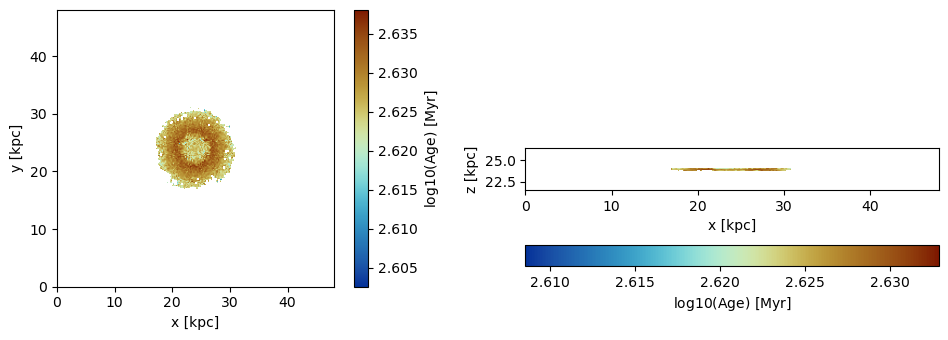

In [53]:
figure(figsize=(10, 3.5))
subplot(1,2,1)
im = imshow( log10.( permutedims(proj_z.maps[:age])), cmap=cmap2, aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}")

subplot(1,2,2)
im = imshow( log10.( permutedims(proj_x.maps[:age])), cmap=cmap2, origin="lower", extent=proj_x.cextent)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=L"\mathrm{log10(Age) \ [Myr]}",orientation="horizontal", pad=0.2);
tight_layout()